# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

**⚠️ IMPORTANT: This notebook was AI-generated and has not been fully verified. Please use caution when interpreting the code or results. ⚠️**

## Overview

This notebook explores [Dandiset 000563, version 0.250311.2145](https://dandiarchive.org/dandiset/000563/0.250311.2145), which contains data from the Allen Institute Openscope "Barcoding" project. The dataset contains extracellular electrophysiology recordings from mice exposed to visual stimuli presented as white noise. The name "Barcoding" refers to the observation that some visual neurons respond with high temporal precision to white noise flicker visual stimuli, creating spike patterns that resemble barcodes.

When white noise visual stimuli are presented repeatedly and the neural responses displayed as spike rasters, the rasters look remarkably like UPC codes or bar codes. These barcodes could potentially serve as identifiers for discrete cell types. The dataset provides these "barcodes" for visually responsive neurons throughout the mouse brain.

## Required Packages

This notebook uses the following packages which should be installed in your Python environment:
- pynwb: For reading NWB files
- h5py: For handling HDF5 files
- remfile: For remote file access
- numpy: For numerical operations
- pandas: For data manipulation
- matplotlib: For visualization
- seaborn: For enhanced visualization

In [1]:
# Import required packages
import pynwb
import h5py
import remfile
from itertools import islice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Set plot style
sns.set_theme()

## Loading Data from DANDI Archive

We'll start by setting up a connection to the DANDI Archive and accessing the Dandiset metadata.

In [2]:
# Connect to DANDI archive and get metadata about the Dandiset
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000563", "0.250311.2145")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145

First 5 assets:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (ID: 55148cf3-9d15-4d05-a190-4a73e007e48d)
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (ID: 1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1)
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (ID: 6e4d0047-ca6b-4d29-b150-bc9e2c445646)
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb (ID: 54cef618-72de-4c69-b441-8bd5e26049c5)
- sub-699241/sub-699241_ses-1318772854_ogen.nwb (ID: c3bbf094-904e-43b7-83d5-be5a8bf3826f)


## Understanding the Dataset Structure

The dataset contains multiple NWB files for each subject, organized by session and probe. Each subject has:

- One `ogen.nwb` file containing information about the optogenetics, stimuli, eye tracking, and units
- Multiple `probe-X_ecephys.nwb` files containing electrophysiology data from individual probes

We are focusing on the `ogen.nwb` files, which contain the units data (spiking activity of neurons) and stimulus information. The ecephys files contain the raw and processed electrophysiological signals, which require more computational resources to analyze and are not the main focus of our exploration.

## Loading an NWB File

Let's load one of the NWB files to explore its contents. We'll use subject 681446 as an example.

In [3]:
# Load an NWB file
url = "https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/"
print(f"Loading file: {url}")

try:
    # Create a remote file object
    remote_file = remfile.File(url)
    
    # Open the file with h5py
    h5_file = h5py.File(remote_file)
    
    # Use pynwb to read the file
    io = pynwb.NWBHDF5IO(file=h5_file)
    nwb = io.read()
    
    print("File loaded successfully!")
    print(f"Session ID: {nwb.session_id}")
    print(f"Subject ID: {nwb.subject.subject_id}")
    print(f"Session description: {nwb.session_description}")
    print(f"Experiment date: {nwb.session_start_time}")
except Exception as e:
    print(f"Error loading file: {e}")

Loading file: https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


File loaded successfully!
Session ID: 1290510496
Subject ID: 681446
Session description: Data and metadata for an Ecephys session
Experiment date: 2023-08-16 00:00:00-07:00


## Examining Subject Information

Let's look at the subject information to understand what animal was used in this recording.

In [4]:
# Print subject information
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Age: {subject.age} (reference: {subject.age__reference})")
print(f"Age in days: {subject.age_in_days}")
print(f"Sex: {subject.sex}")
print(f"Species: {subject.species}")
print(f"Strain: {subject.strain}")
print(f"Genotype: {subject.genotype}")

Subject ID: 681446
Age: P112D (reference: birth)
Age in days: 112.0
Sex: M
Species: Mus musculus
Strain: Transgenic
Genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt


## Understanding the Stimuli

The stimuli in this experiment are key to understanding the barcode patterns. Let's examine the stimulus presentations.

In [5]:
# Get the available interval types
print("Available interval types:")
for interval_name in nwb.intervals:
    print(f"- {interval_name}")

Available interval types:
- RepeatFFF_presentations
- UniqueFFF_presentations
- invalid_times
- receptive_field_block_presentations
- static_block_presentations


### Examining Repeated Full Field Flicker (RepeatFFF) Stimuli

The "barcode" patterns are particularly related to the repeated presentation of identical white noise sequences. Let's look at the "RepeatFFF" stimuli which are repeatedly presented full field flicker stimuli.

In [6]:
# Get information about the RepeatFFF presentations
repeat_fff = nwb.intervals['RepeatFFF_presentations']
print(f"Number of RepeatFFF presentations: {len(repeat_fff.id[:])}")

# Get the first 10 presentations
repeat_fff_df = repeat_fff.to_dataframe().head(10)

# Display the start and stop times
print("\nFirst 10 RepeatFFF presentations:")
print(repeat_fff_df[['start_time', 'stop_time', 'stimulus_name']])

# Calculate the average stimulus duration
durations = repeat_fff_df['stop_time'] - repeat_fff_df['start_time']
print(f"\nAverage stimulus duration: {durations.mean():.6f} seconds")

# Look at the inter-stimulus intervals
isi = np.diff(repeat_fff_df['start_time'])
print(f"Average inter-stimulus interval: {isi.mean():.6f} seconds")
print(f"This matches the stimulus duration, suggesting the stimuli are presented back-to-back")

Number of RepeatFFF presentations: 43200



First 10 RepeatFFF presentations:
    start_time  stop_time stimulus_name
id                                     
0    163.46116  163.47784     RepeatFFF
1    163.47784  163.49453     RepeatFFF
2    163.49453  163.51118     RepeatFFF
3    163.51118  163.52780     RepeatFFF
4    163.52780  163.54457     RepeatFFF
5    163.54457  163.56125     RepeatFFF
6    163.56125  163.57791     RepeatFFF
7    163.57791  163.59459     RepeatFFF
8    163.59459  163.61130     RepeatFFF
9    163.61130  163.62797     RepeatFFF

Average stimulus duration: 0.016681 seconds
Average inter-stimulus interval: 0.016682 seconds
This matches the stimulus duration, suggesting the stimuli are presented back-to-back


## Exploring Units (Neurons)

Now let's look at the units (neurons) in the dataset. The units table contains information about all sorted neural units.

In [7]:
# Get basic information about the units
units = nwb.units
print(f"Number of units: {len(units.id[:])}")
print(f"Available unit properties: {units.colnames}")

# Create a dataframe with the units information
units_df = units.to_dataframe()

# Count units by quality
quality_counts = units_df['quality'].value_counts()
print("\nUnits by quality:")
print(quality_counts)

# Look at some basic statistics for the good units
good_units = units_df[units_df['quality'] == 'good']
print(f"\nNumber of good quality units: {len(good_units)}")
print("\nFiring rate statistics for good units:")
print(good_units['firing_rate'].describe())

Number of units: 2572
Available unit properties: ('isi_violations', 'isolation_distance', 'PT_ratio', 'snr', 'spread', 'local_index', 'cluster_id', 'waveform_halfwidth', 'cumulative_drift', 'velocity_above', 'l_ratio', 'waveform_duration', 'repolarization_slope', 'amplitude', 'amplitude_cutoff', 'recovery_slope', 'velocity_below', 'd_prime', 'max_drift', 'peak_channel_id', 'quality', 'silhouette_score', 'nn_hit_rate', 'presence_ratio', 'firing_rate', 'nn_miss_rate', 'spike_times', 'spike_amplitudes', 'waveform_mean')



Units by quality:
quality
good     1863
noise     709
Name: count, dtype: int64

Number of good quality units: 1863

Firing rate statistics for good units:
count    1863.000000
mean        5.153281
std         7.298852
min         0.000246
25%         0.801099
50%         2.899888
75%         6.509346
max        69.575260
Name: firing_rate, dtype: float64


## Visualizing Barcode Patterns

To visualize the barcode patterns, we'll select units with high firing rates and create raster plots that show their responses to repeated stimuli. Rather than trying to find barcode patterns algorithmically (which can be complex), we'll manually select a few units with high firing rates to visualize.

In [8]:
# Get the RepeatFFF stimulus start times
repeat_fff_starts = repeat_fff.start_time[:]

# Select a few good units with high firing rates to examine
top_units = good_units.sort_values(by='firing_rate', ascending=False).head(10).index.tolist()
print(f"Selected {len(top_units)} units with highest firing rates for visualization")

Selected 10 units with highest firing rates for visualization


### Creating Raster Plots

Let's create raster plots for the selected units to visualize their responses to the RepeatFFF stimuli. These plots will show the timing of spikes (neural action potentials) across multiple trials.

In [9]:
# Function to create raster plots
def create_raster_plot(unit_id, spike_times, trial_starts, window_size=0.1, max_trials=50):
    """
    Create a raster plot showing spikes aligned to stimulus onset
    
    Args:
        unit_id: ID of the unit being plotted
        spike_times: Array of spike times for this unit
        trial_starts: Array of stimulus onset times
        window_size: Time window to plot after stimulus onset (in seconds)
        max_trials: Maximum number of trials to plot
    """
    trial_indices = []
    spike_times_rel = []
    
    # Limit the number of trials to plot
    trials_to_plot = min(max_trials, len(trial_starts))
    
    # For each trial, find spikes that occurred within the window
    for i in range(trials_to_plot):
        start_time = trial_starts[i]
        end_time = start_time + window_size
        
        # Find spikes in this window
        mask = (spike_times >= start_time) & (spike_times < end_time)
        these_spikes = spike_times[mask]
        
        # Convert to relative time and add to lists
        if len(these_spikes) > 0:
            rel_times = these_spikes - start_time
            trial_indices.extend([i] * len(rel_times))
            spike_times_rel.extend(rel_times)
    
    # Create the plot
    plt.scatter(spike_times_rel, trial_indices, s=2, c='black')
    plt.xlim(0, window_size)
    plt.ylim(-1, trials_to_plot)
    plt.xlabel("Time from stimulus onset (s)")
    plt.ylabel("Trial #")
    plt.title(f"Unit {unit_id} response to repeated stimuli")
    
    # Add vertical lines to indicate stimulus duration
    stim_duration = 0.016681  # From the analysis above
    plt.axvline(0, color='r', linestyle='--', alpha=0.5, label='Stimulus onset')
    plt.axvline(stim_duration, color='g', linestyle='--', alpha=0.5, label='Stimulus offset')
    plt.legend(loc='upper right')
    
    return len(spike_times_rel) > 0  # Return True if there are spikes to plot

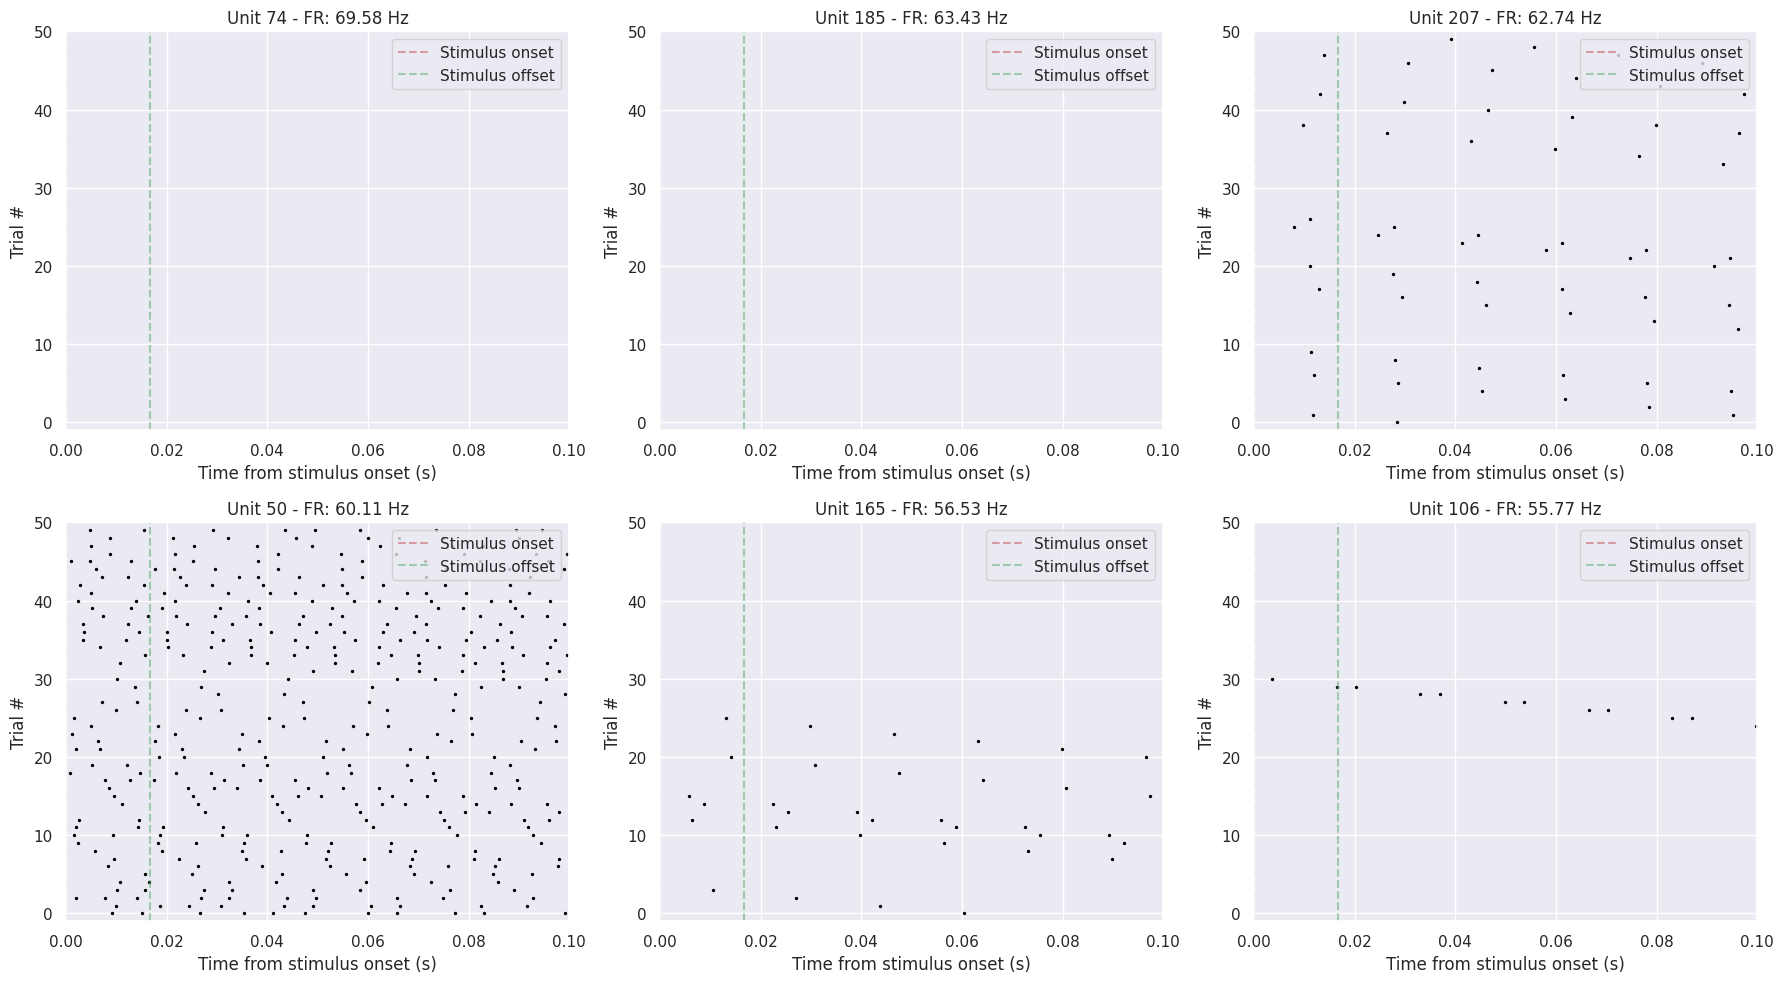

In [10]:
# Create a figure with 6 subplots (2x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot the first 6 units
for i in range(min(6, len(top_units))):
    plt.sca(axes[i])
    unit_idx = top_units[i]
    
    # Get spike times and unit info
    spike_times = nwb.units['spike_times'][unit_idx]
    unit_info = units_df.loc[unit_idx]
    
    # Create the raster plot
    create_raster_plot(unit_info['cluster_id'], spike_times, repeat_fff_starts, window_size=0.1)
    plt.title(f"Unit {unit_info['cluster_id']} - FR: {unit_info['firing_rate']:.2f} Hz")

plt.tight_layout()

### Detailed View of a Single Unit

Let's take a closer look at a single unit to better visualize the barcode pattern. We'll show both a detailed raster plot and a PSTH (Peri-Stimulus Time Histogram).

In [11]:
# Select the first unit for detailed analysis
selected_unit_idx = top_units[0]
selected_unit = units_df.loc[selected_unit_idx]
selected_unit_id = selected_unit['cluster_id'] if 'cluster_id' in selected_unit else selected_unit_idx
selected_unit_spikes = nwb.units['spike_times'][selected_unit_idx]
selected_unit_fr = selected_unit['firing_rate']

print(f"Selected Unit ID: {selected_unit_id}")
print(f"Firing Rate: {selected_unit_fr:.2f} Hz")
print(f"Total spikes: {len(selected_unit_spikes)}")

Selected Unit ID: 74
Firing Rate: 69.58 Hz
Total spikes: 16962


### Visualizing the Barcode Pattern Across Multiple Stimuli

To better visualize the "barcode" pattern, let's create a plot that spans multiple consecutive stimulus presentations.

([], [])

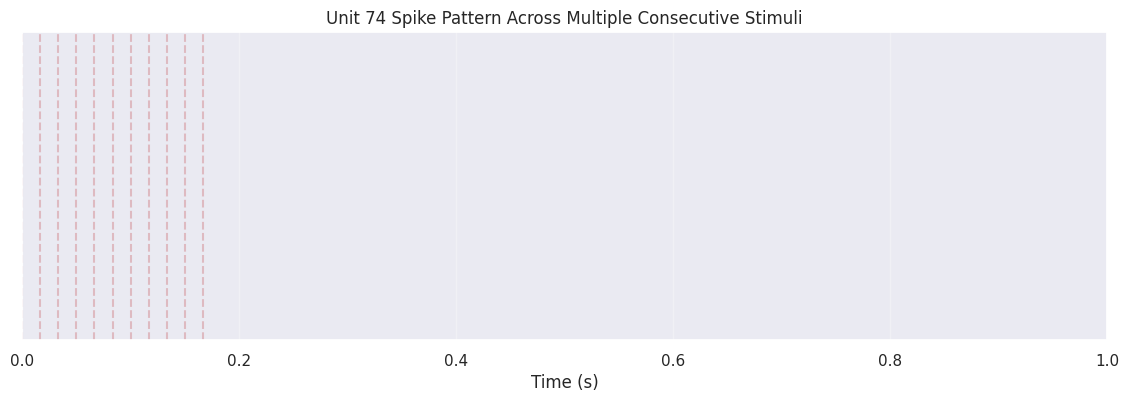

In [12]:
# Create a plot showing spikes across multiple consecutive stimulus presentations
# This helps visualize the consistent "barcode" pattern

# Find a sequence of consecutive stimulus presentations
start_idx = 100  # Start at the 100th presentation (arbitrary)
num_presentations = 10
sequence_start = repeat_fff_starts[start_idx]
sequence_end = repeat_fff_starts[start_idx + num_presentations]

# Find all spikes in this time range
mask = (selected_unit_spikes >= sequence_start) & (selected_unit_spikes <= sequence_end)
these_spikes = selected_unit_spikes[mask]
rel_times = these_spikes - sequence_start

# Plot the spikes as a spike raster (1D)
plt.figure(figsize=(14, 4))
plt.eventplot([rel_times], lineoffsets=[0], linelengths=[0.5], linewidths=[1])
plt.xlabel("Time (s)")
plt.title(f"Unit {selected_unit_id} Spike Pattern Across Multiple Consecutive Stimuli")

# Add vertical lines for stimulus onsets
for i in range(num_presentations + 1):
    try:
        stim_time = repeat_fff_starts[start_idx + i] - sequence_start
        plt.axvline(stim_time, color='r', linestyle='--', alpha=0.3)
    except IndexError:
        pass  # In case we run out of stimuli

plt.grid(True, alpha=0.3)
plt.yticks([])  # Hide y ticks as they're not meaningful here

### PSTH (Peri-Stimulus Time Histogram)

Another way to visualize neural responses is with a PSTH, which shows the average firing rate over time across multiple stimulus presentations.

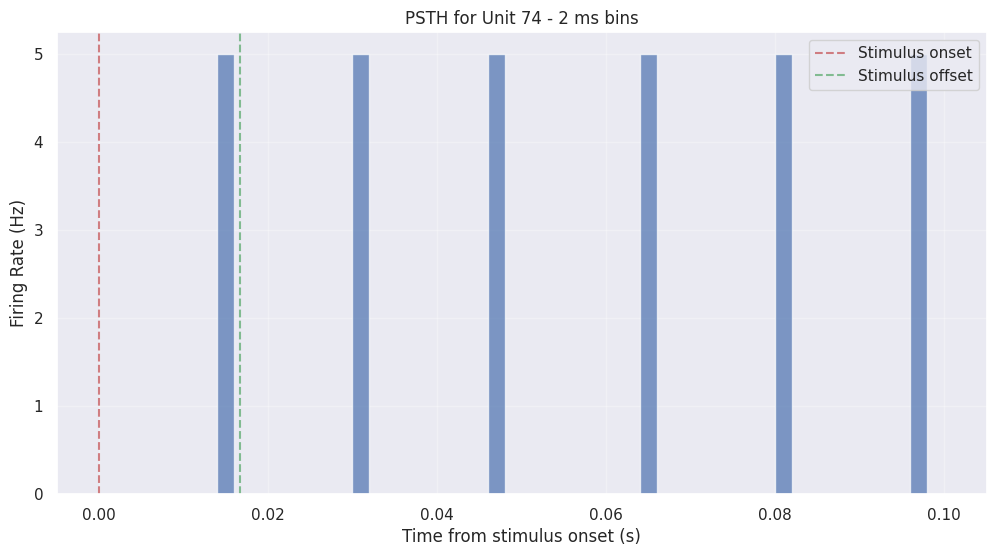

In [13]:
# Create a PSTH for the selected unit
window_size = 0.1  # 100 ms post-stimulus
num_trials = 100  # Use 100 trials for a smoother PSTH

# Collect all spike times relative to stimulus onset
all_rel_times = []
for i in range(num_trials):
    if i >= len(repeat_fff_starts):
        break
        
    start_time = repeat_fff_starts[i]
    end_time = start_time + window_size
    
    # Find spikes in this window
    mask = (selected_unit_spikes >= start_time) & (selected_unit_spikes < end_time)
    these_spikes = selected_unit_spikes[mask]
    
    # Convert to relative time
    if len(these_spikes) > 0:
        rel_times = these_spikes - start_time
        all_rel_times.extend(rel_times)

# Create the PSTH with appropriate bin size
plt.figure(figsize=(12, 6))

# Use fine bins to capture the temporal precision of the response
bin_size_ms = 2  # 2 ms bins
bins = np.linspace(0, window_size, int(window_size*1000/bin_size_ms) + 1)
hist, bin_edges = np.histogram(all_rel_times, bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Convert to firing rate in Hz
firing_rate = hist / (num_trials * bin_size_ms/1000)

# Plot the PSTH
plt.bar(bin_centers, firing_rate, width=bin_edges[1]-bin_edges[0], alpha=0.7)
plt.xlabel("Time from stimulus onset (s)")
plt.ylabel("Firing Rate (Hz)")
plt.title(f"PSTH for Unit {selected_unit_id} - {bin_size_ms} ms bins")

# Add vertical line for stimulus duration
stim_duration = 0.016681  # From analysis above
plt.axvline(0, color='r', linestyle='--', alpha=0.7, label='Stimulus onset')
plt.axvline(stim_duration, color='g', linestyle='--', alpha=0.7, label='Stimulus offset')
plt.legend()

plt.grid(True, alpha=0.3)

## Understanding the Barcode Phenomenon

The "barcode" pattern refers to the highly precise, temporally consistent spike patterns that some neurons exhibit in response to repeated presentations of the same stimulus. The temporal precision of these responses can be seen in both the raster plots and the PSTH.

Key characteristics of a barcode pattern include:

1. **Temporal precision**: Spikes occur at the same time relative to stimulus onset across trials
2. **Consistency**: The pattern is reproducible across multiple presentations of the same stimulus
3. **Distinctive pattern**: Different neurons may have different "barcode" patterns, potentially related to their functional role

These precise firing patterns suggest that exact spike timing (not just average firing rate) carries important information in the visual system.

## Exploring Different Stimulus Types

Let's compare the different types of stimuli used in this experiment.

In [14]:
# Get information about the different stimulus types
print("Stimulus presentation counts:")
for stim_type in ['RepeatFFF_presentations', 'UniqueFFF_presentations', 'static_block_presentations', 'receptive_field_block_presentations']:
    presentations = nwb.intervals[stim_type]
    count = len(presentations.id[:])
    start_times = presentations.start_time[:5]
    durations = presentations.stop_time[:5] - presentations.start_time[:5]
    
    print(f"\n{stim_type}:")
    print(f"  Count: {count}")
    print(f"  Sample start times: {start_times}")
    print(f"  Sample durations: {durations}")

Stimulus presentation counts:

RepeatFFF_presentations:
  Count: 43200
  Sample start times: [163.46116 163.47784 163.49453 163.51118 163.5278 ]
  Sample durations: [0.01668 0.01669 0.01665 0.01662 0.01677]

UniqueFFF_presentations:
  Count: 14400
  Sample start times: [43.36058 43.37723 43.39388 43.4106  43.42723]
  Sample durations: [0.01665 0.01665 0.01672 0.01663 0.01664]

static_block_presentations:
  Count: 345600
  Sample start times: [1004.16662 1004.18327 1004.19993 1004.21663 1004.23332]
  Sample durations: [0.01665 0.01666 0.0167  0.01669 0.0167 ]

receptive_field_block_presentations:
  Count: 1920
  Sample start times: [6769.02092 6769.27114 6769.52135 6769.77153 6770.02176]
  Sample durations: [0.25022 0.25021 0.25018 0.25023 0.25022]


## Creating a Neurosift Link

The Neurosift app provides an interactive way to explore NWB files. Here's a link to view one of the NWB files:

In [15]:
# Create a Neurosift link for the selected NWB file
asset_id = "2f2ac304-83a3-4352-8612-5f34b68062a0"  # This is the asset ID we've been using
neurosift_url = f"https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/{asset_id}/download/&dandisetId=000563&dandisetVersion=0.250311.2145"
print(f"Neurosift link: {neurosift_url}")

Neurosift link: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/&dandisetId=000563&dandisetVersion=0.250311.2145


## Summary and Findings

In this notebook, we've explored Dandiset 000563, which contains recordings of neural responses to white noise visual stimulation. The key findings include:

1. The dataset contains recordings from multiple subjects, with each subject having one ogen.nwb file and multiple probe-specific ecephys.nwb files.

2. The experiment used several types of visual stimuli, including Repeated Full Field Flicker (RepeatFFF), Unique Full Field Flicker (UniqueFFF), static gratings, and receptive field mapping stimuli. The stimuli are very brief (about 16.7 ms duration).

3. The "barcode" patterns can be seen in raster plots of neural responses to the repeated stimuli, where the precise timing of spikes creates a distinctive pattern that is consistent across trials.

4. These barcode patterns show remarkable temporal precision, with spikes occurring at highly consistent times relative to stimulus onset across multiple trial presentations. This precision suggests that the exact timing of spikes, not just the overall firing rate, carries important visual information.

5. The PSTH provides another view of these precise response patterns, showing peaks in firing rate at specific times after stimulus onset.

## Future Directions

This dataset offers several interesting avenues for further exploration:

1. **Comparison across brain regions**: Analyze how units from different brain regions respond to the same stimuli, and whether the "barcode" patterns are specific to certain regions.

2. **Feature extraction from barcode patterns**: Develop methods to quantify the temporal precision and consistency of spike patterns, which could be used to classify cell types.

3. **Comparison of responses to different stimulus types**: Analyze how the same units respond to different stimulus types (RepeatFFF vs. UniqueFFF vs. static gratings).

4. **Information content analysis**: Quantify how much information the precise spike timing carries versus the overall firing rate.

5. **Population analysis**: Look at correlations between units to understand how populations of neurons encode the visual stimuli.